# Sentiment Analysis with Python Project



Automated Extraction of IMDb Movie Reviews Using Selenium WebDriver

we initializes a web browser using Selenium, directing it to the IMDb page for "The Sound of Music" reviews. It sets up a mechanism to wait for elements to load, then repeatedly clicks the "Load More" button until all reviews are visible on the page. Each click dynamically loads additional reviews until no more are available. Finally, it retrieves the HTML content of the fully loaded page, allowing access to all the reviews for further analysis or processing. After which it closes the WebDriver session.

In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# IMDb URL for 'The Sound of Music' reviews page
url = "https://www.imdb.com/title/tt0059742/reviews?ref_=tt_urv"

# Open the IMDb reviews page
driver.get(url)

# Wait for the page to load
wait = WebDriverWait(driver, 10)

# Function to check if the "Load More" button exists and click it
def click_load_more():
    try:
        load_more_button = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'ipl-load-more__button')))
        load_more_button.click()
        return True
    except:
        return False

# Click the "Load More" button until it's no longer visible
while click_load_more():
    time.sleep(2)  # Wait for a while after clicking (you can adjust this as needed)

# Get the HTML content of the final page after loading all reviews
html = driver.page_source

# Close the WebDriver
driver.quit()

Now we utilizes BeautifulSoup, a Python library, to scrape user reviews, reviewer names, and review dates from a webpage.  it parses the HTML content retrieved earlier. It then identifies and extracts information from individual review containers on the webpage. For each review, it retrieves the reviewer's name, review date, and review text, presenting this information for valid reviews found on the page.

In [12]:
from bs4 import BeautifulSoup

# Extract user reviews, reviewer names, and dates using BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
reviews_containers = soup.find_all('div', class_='review-container')

for container in reviews_containers:
    review_text_tag = container.find('div', class_='text show-more__control')
    review_text = review_text_tag.get_text(strip=True) if review_text_tag else None

    if review_text:
        review_date_tag = container.find('span', class_='review-date')
        review_date = review_date_tag.text if review_date_tag else "Date not found"

        reviewer_name_tag = container.find('span', class_='display-name-link')
        reviewer_name = reviewer_name_tag.text if reviewer_name_tag else "Reviewer name not found"

        print(f"Reviewer Name: {reviewer_name}")
        print(f"Review Date: {review_date}")
        print(f"Review Text: {review_text}\n")

Reviewer Name: jacobs-greenwood
Review Date: 11 December 2016
Review Text: Capitalizing on two "hot" properties of the early sixties, director Robert Wise and the infinitely talented Julie Andrews, this film delivers some pure cinematic magic like none before it nor since, especially the sequences which feature the songs "Do Re Mi" (#88 on AFI's 100 Top Movie Songs of All Time) through the streets of Salzburg and "The Lonely Goatherd", performed with puppets.These, among others, helped it capture the Best Picture Oscar that year over David Lean's Doctor Zhivago (1965), Stanley Kramer's Ship of Fools (1965), A Thousand Clowns (1965), and Darling (1965), which (like Doctor Zhivago (1965), also) features Julie Christie, in her Oscar winning Best Actress performance. Wise, who would later receive the Irving G. Thalberg Award from the Academy, picked up his second Best Director Oscar for this film; Andrews her second consecutive Best Actress nomination (she'd won for her film debut in Mary 

The next step involves importing the necessary libraries. nltk contains VADER for sentiment analysis, BeautifulSoup helps parse HTML content, and SentimentIntensityAnalyzer is the VADER tool for sentiment analysis.

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup

# Download VADER lexicon if not already downloaded
# nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()


BeautifulSoup library is used to parse HTML content and extract user reviews for sentiment analysis using VADER (Valence Aware Dictionary and sEntiment Reasoner) from the NLTK library.
After performing sentiment analysis using VADER, we store the data in a pandas DataFrame named scored_review. 
The process involves breaking down the reviews into negative, neutral, positive sentiments, and an overall compound score. The sentiment analysis is then structured into a pandas DataFrame, presenting a comprehensive view of reviewers' sentiments, aiding in better comprehension and analysis of the collected data.

In [14]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup

# HTML content fetched earlier
soup = BeautifulSoup(html, 'html.parser')
reviews_containers = soup.find_all('div', class_='review-container')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Initialize lists to store review details
review_data = []

# Loop through review containers
for container in reviews_containers:
    review_text_tag = container.find('div', class_='text show-more__control')
    review_text = review_text_tag.get_text(strip=True) if review_text_tag else None

    if review_text:
        review_date_tag = container.find('span', class_='review-date')
        review_date = review_date_tag.text if review_date_tag else "Date not found"

        reviewer_name_tag = container.find('span', class_='display-name-link')
        reviewer_name = reviewer_name_tag.text if reviewer_name_tag else "Reviewer name not found"

        # Perform sentiment analysis using VADER
        scores = sia.polarity_scores(review_text)

        # Append review details and sentiment scores to the list
        review_data.append([reviewer_name, review_date, review_text, scores['neg'], scores['neu'], scores['pos'], scores['compound']])

# Define column names for the DataFrame
columns = ['reviewer_name', 'review_date', 'review_text', 'neg', 'neu', 'pos', 'compound']

# Create DataFrame from the list of lists (review_data) and column names
scored_reviews = pd.DataFrame(review_data, columns=columns)

# Display the DataFrame
# print(scored_reviews)
scored_reviews


,reviewer_name,review_date,review_text,neg,neu,pos,compound
0,jacobs-greenwood,11 December 2016,"Capitalizing on two ""hot"" properties of the ea...",0.030,0.802,0.169,0.9991
1,brett-76260,28 April 2018,Song and dance is definitely not my thing. How...,0.031,0.773,0.196,0.8776
2,Smells_Like_Cheese,23 February 2005,Sound of Music is one of the best musicals of ...,0.047,0.757,0.197,0.9989
3,happipuppi13,6 August 2015,*** This review may contain spoilers ***A few ...,0.037,0.748,0.215,0.9983
4,duffjerroldorg,12 April 2017,"Let me confess I'm not a Catholic, I don't hav...",0.055,0.700,0.245,0.9875
...,...,...,...,...,...,...,...
359,falcone-167-888726,22 September 2011,"Based in Austria during the 1930's, The Sound ...",0.076,0.794,0.130,0.8641
360,rcc1-6,29 December 2003,I've seen the sound of music many times and I ...,0.000,0.877,0.123,0.7841
361,dramadevil052,8 June 2004,SPOILER!!!!! The movie The Sound of Music is a...,0.071,0.754,0.174,0.9936
362,camtor,3 May 2004,I would like to say this is the greatest film ...,0.034,0.832,0.134,0.9457


using the data we computes the mean compound sentiment score per year and plots it as a bar chart using Matplotlib.
This is done by, first it generating a bar plot using Matplotlib, where the x-axis represents the years, the y-axis shows the mean compound sentiment score, and each bar denotes the average sentiment for that specific year. This visualization provides an overview of how sentiment has trended over different years based on the reviews analyzed.

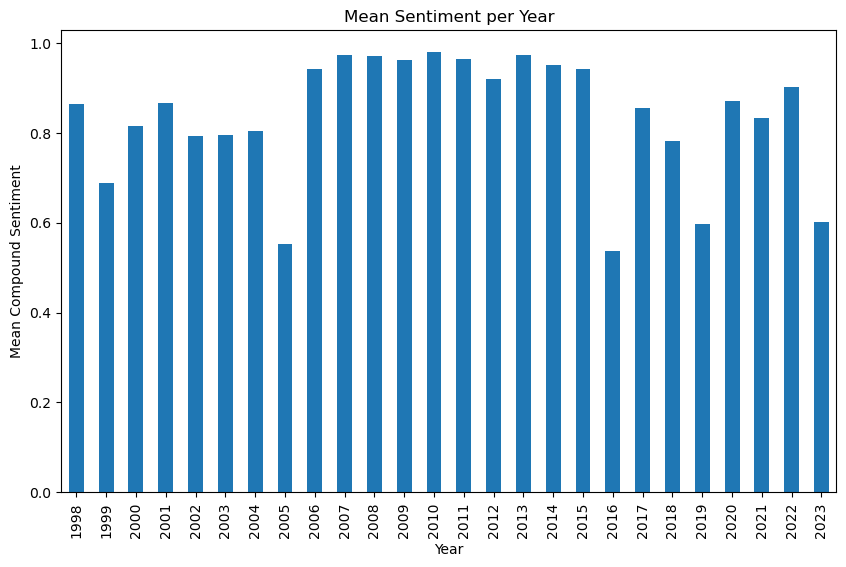

In [15]:
import matplotlib.pyplot as plt

# Convert the date column to datetime format
scored_reviews['review_date'] = pd.to_datetime(scored_reviews['review_date'])

# Grouping by year and calculating the mean compound sentiment score
scored_reviews['year'] = scored_reviews['review_date'].dt.year
mean_sentiment_by_year = scored_reviews.groupby('year')['compound'].mean()

# Plotting the mean compound sentiment score per year
mean_sentiment_by_year.plot(kind='bar', figsize=(10, 6), xlabel='Year', ylabel='Mean Compound Sentiment', title='Mean Sentiment per Year')
plt.show()


Here we uses Matplotlib to generate a 2x2 grid of histograms, each representing a different sentiment score (negative, neutral, positive, compound) derived from the 'scored_reviews' dataset. Each histogram shows the distribution of scores within their respective sentiment category. The 'bins=20' parameter sets the number of bins in each histogram, providing a visualization of how sentiment scores are distributed across different sentiments. The 'tight_layout()' function optimizes the spacing between subplots for better readability, and 'plt.show()' displays the generated plot. This visualization helps to understand the frequency or count of sentiment scores in each sentiment category.

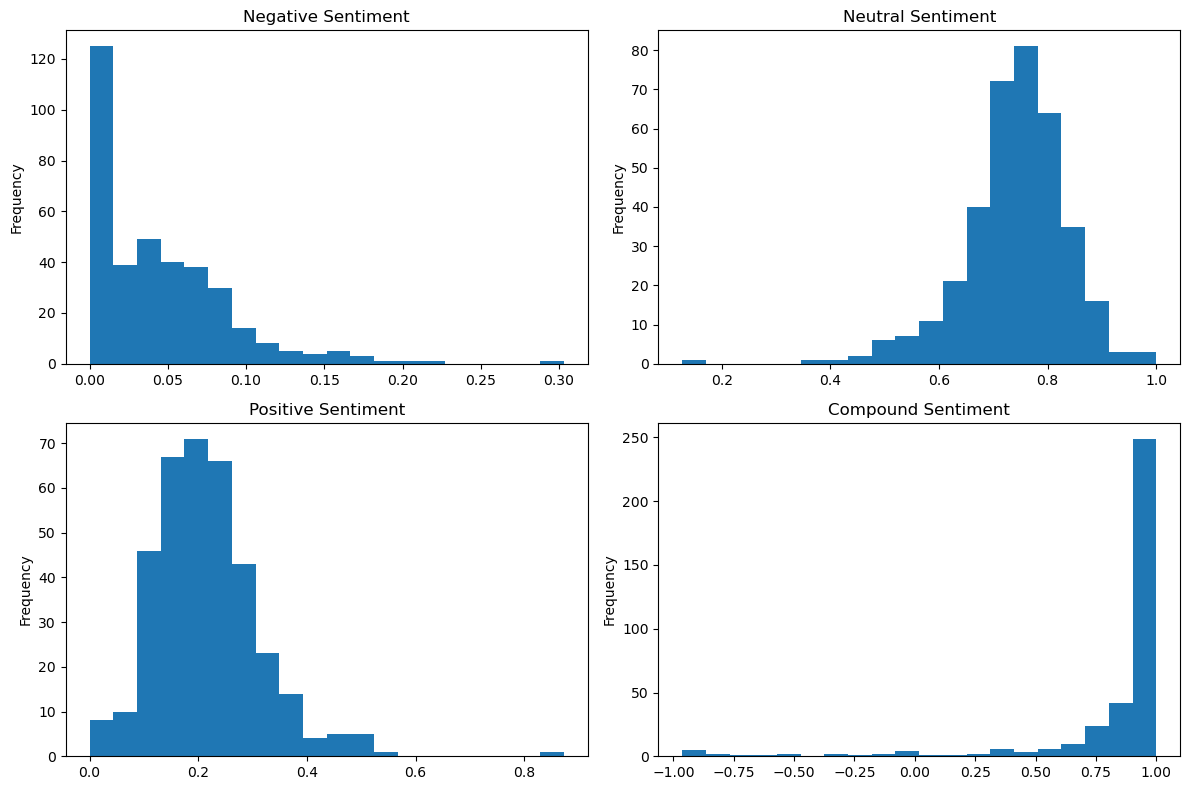

In [16]:
import matplotlib.pyplot as plt

# Assuming 'scored_reviews' contains columns ['neg', 'neu', 'pos', 'compound']

# Create subplots for each sentiment score
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms for negative, neutral, positive, and compound scores
scored_reviews['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], title='Negative Sentiment')
scored_reviews['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], title='Neutral Sentiment')
scored_reviews['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], title='Positive Sentiment')
scored_reviews['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], title='Compound Sentiment')

plt.tight_layout()
plt.show()



## **Automated Extraction of IMDb Movie Reviews Using Selenium WebDriver**

### **Overview**

The goal of this project is to automate the process of extracting movie reviews from the IMDb website and perform sentiment analysis on the collected data. By leveraging Python libraries such as Selenium WebDriver, BeautifulSoup, NLTK, pandas, and Matplotlib, this project streamlines the extraction of user reviews, analyzes sentiment, and visualizes sentiment trends for the movie "The Sound of Music."

### **Project Workflow**

1. **Selenium Initialization**:
The project begins by initializing a Chrome WebDriver using the Selenium library. The WebDriver is directed to the IMDb page for "The Sound of Music" reviews (specifically, the URL: **`https://www.imdb.com/title/tt0059742/reviews?ref_=tt_urv`**).
2. **Web Scraping with BeautifulSoup**:
After opening the IMDb reviews page, the BeautifulSoup library is utilized to parse the HTML content. The script identifies and extracts crucial information from individual review containers on the webpage. This includes the reviewer's name, review date, and review text for each review available on the page.
3. **Sentiment Analysis using VADER**:
The NLTK library's VADER sentiment analysis tool is employed to perform sentiment analysis on the extracted reviews. VADER assigns sentiment scores for negativity, neutrality, positivity, and an overall compound score to each review. These scores provide an insight into the sentiment expressed in each review.
4. **Data Structuring with Pandas**:
The sentiment analysis results are structured into a pandas DataFrame named **`scored_reviews`**. This DataFrame organizes the reviewer names, review dates, review texts, and sentiment scores (negative, neutral, positive, compound) in a tabular format for easy analysis and manipulation.
5. **Visualizing Sentiment Trends**:
To better understand sentiment trends over time, the project computes the mean compound sentiment score per year using the **`scored_reviews`** DataFrame. This information is visualized through a bar chart generated with Matplotlib, illustrating sentiment changes over different years based on the analyzed reviews.
6. **Sentiment Distribution Visualization**:
Additionally, the project creates histograms using Matplotlib to showcase the distribution of negative, neutral, positive, and compound sentiment scores. These visualizations aid in understanding the frequency and distribution of sentiment scores within their respective categories.

### **Conclusion**

This project demonstrates the automation of data extraction from web sources, sentiment analysis of textual data, and visualization of sentiment trends. By combining Selenium WebDriver for web scraping, NLTK for sentiment analysis, and visualization libraries like Matplotlib, it provides a comprehensive analysis of IMDb movie reviews for "The Sound of Music."
This project is Bounty project from StackUp: Sentiment Analysis with Python Project
